In [34]:
import nltk
import os 
from nltk.stem.wordnet import WordNetLemmatizer 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify
import numpy as np

lem = WordNetLemmatizer()

In [35]:
O_doc = open("g18-neurohub.txt" , "r", encoding='utf-8')    
Lines_doc =O_doc.readlines()
O_doc.close()

# define variables
countLine = 0
SuperlativeNumber=0
NegativeNumber=0
ComparativeNumber=0
Wh_PronounsNumber=0
PronounsNumber=0
OtherNumber=0

my_values=[]
my_lables=[]
numberOfTotalSmells = []
numberOfNegativeSmell = []
numberOfComparativeSmell= []
numberOfSuperlativeSmell=[]
numberOfWH_PronounsSmell=[]
numberOfotherSmell=[]
numberOfPronounsSmell=[]

#read every line of doc
for line in Lines_doc:
    smell_number=0
    countLine=countLine+1 
    my_values.append(len(line))
    my_lables.append('R'+str(countLine))
    #print("\nIn Line: " + str(countLine))
    #print(line)

    Tagged_words=Pos_taging(line)
    
    nNum=NegativeSmell(Tagged_words)
    smell_number= smell_number+nNum 
    NegativeNumber=NegativeNumber+nNum
    numberOfNegativeSmell.append(nNum)
    
    
    cNum=ComparativeSmell(Tagged_words)
    smell_number= smell_number+cNum
    ComparativeNumber=ComparativeNumber+cNum
    numberOfComparativeSmell.append(cNum)
    
    
    sNum=SuperlativeSmell(Tagged_words)
    smell_number= smell_number+sNum
    SuperlativeNumber= SuperlativeNumber+sNum
    numberOfSuperlativeSmell.append(sNum)
    

    wh_pNUm=WH_PronounsSmell(Tagged_words)
    smell_number= smell_number+wh_pNUm
    Wh_PronounsNumber=Wh_PronounsNumber+wh_pNUm
    numberOfWH_PronounsSmell.append(wh_pNUm)
    
    
    pNum=PronounsSmell(Tagged_words)
    smell_number= smell_number+pNum
    PronounsNumber=PronounsNumber+pNum
    numberOfPronounsSmell.append(pNum)
    
    oNum=otherSmell(Tagged_words)
    smell_number= smell_number+oNum
    OtherNumber=OtherNumber+oNum
    numberOfotherSmell.append(oNum)
    numberOfTotalSmells.append(smell_number)
    
    #kk(Tagged_words)
    

print("\n***************")
print("\nNumber of negative smells: " + str(NegativeNumber))
print("Number of Comparative smells: " + str(ComparativeNumber))
print("Number of Superlative smells: " + str(SuperlativeNumber))
print("Number of Wh_Pronouns smells: " + str(Wh_PronounsNumber))
print("Number of Pronouns smells: " + str(PronounsNumber))
print("Number of other vague smells: " + str(OtherNumber))




 Line 8 length: 152
    Vague(other) smell in word 20 :  ('normal', 'JJ')

 Line 11 length: 90
    Pronouns smell in word 13 :  ('them', 'PRP')

 Line 12 length: 114
    Pronouns smell in word 13 :  ('them', 'PRP')

 Line 13 length: 119
    Pronouns smell in word 13 :  ('them', 'PRP')

 Line 20 length: 98
    WH_Pronouns smell in word 9 :  ('what', 'WP')

 Line 21 length: 61
    Vague(other) smell in word 9 :  ('large', 'JJ')

 Line 23 length: 81
    Pronouns smell in word 16 :  ('its', 'PRP$')

 Line 24 length: 86
    Pronouns smell in word 18 :  ('their', 'PRP$')

 Line 28 length: 71
    WH_Pronouns smell in word 9 :  ('what', 'WP')

 Line 29 length: 78
    Vague(other) smell in word 11 :  ('might', 'MD')

 Line 30 length: 69
    Comparative smell in word 11 :  ('older', 'JJR')

 Line 35 length: 95
    Vague(other) smell in word 15 :  ('support', 'VB')

 Line 46 length: 79
    Vague(other) smell in word 12 :  ('rather', 'RB')

 Line 48 length: 106
    Comparative smell in word 15 : 

In [4]:
def Pos_taging(line):
 tokens = nltk.word_tokenize(line)
 #print(tokens)
 tagged = nltk.pos_tag(tokens)

 #print(tagged)
 return tagged

In [5]:
def NegativeSmell(taggedWords):
    negativeDic={"never","no","nothing","nowhere","noone","none","not","n't"}

    countWords=0
    number=0
    
    for i in taggedWords:
        countWords=countWords+1
        #if i[1]=='RB':
            #print("    Negative word "+str(countWords)+" :  "+str(i))
        if i[0] in negativeDic:
            print("\n Line " + str(countLine) +" length: "+ str(len(line)))
            print("    Negative smell in word "+str(countWords)+" :  "+str(i))
            number=number+1
    return number

In [6]:
def ComparativeSmell(taggedWords):
    countWords=0
    number=0
    for j in taggedWords:
        countWords=countWords+1
        if (j[1] =='RBR' or j[1]=='JJR'):
            print("\n Line " + str(countLine)+" length: "+ str(len(line)))
            print("    Comparative smell in word "+str(countWords)+" :  "+str(j))
            number= number+1
    return number

In [7]:
def SuperlativeSmell(taggedWords):
    countWords=0
    number=0
    for k in taggedWords:
        countWords=countWords+1
        if (k[1] =='RBS' or k[1]=='JJS'):
            print("\n Line " + str(countLine)+" length: "+ str(len(line)))
            print("    Superlative smell in word "+str(countWords)+" :  "+str(k))
            number= number+1
    return number

In [8]:
def WH_PronounsSmell(taggedWords):
    countWords=0
    number=0
    for l in taggedWords:
        countWords=countWords+1
        if (l[1]=='WP' or l[1]=='WP$'):
            #l[1] =='WDT' or
            print("\n Line " + str(countLine)+" length: "+ str(len(line)))
            print("    WH_Pronouns smell in word "+str(countWords)+" :  "+str(l))
            number= number+1
    return number

In [9]:
def PronounsSmell(taggedWords):
    countWords=0
    number=0
    for m in taggedWords:
        countWords=countWords+1
        if ((m[1] =='PRP' or m[1]=='PRP$')and (m[0]!='I' and m[0]!='my')):
            print("\n Line " + str(countLine)+" length: "+ str(len(line)))
            print("    Pronouns smell in word "+str(countWords)+" :  "+str(m))
            number= number+1
    return number

In [10]:
def otherSmell(taggedWords):
    number=0
    countWords=0
    vagueList={'a bit','almost','as much as','basically','fairly','in a sense','likely','many','may','might','moderately','most','often','probabely','quite','rather','relatively','reasonably','seems','some','somehow','somewhat','usually',
               'average','easy','efficient','etcetera','fast','flexible','improved','intuitive','large','maximize','minimize','normal','often','optimize','optionally','preferably','probably','rapid','reasonable','robust','simple','state-of-the-art','sufficient','support','friendly','usual',
              'effective','significant','minimal','maximal','too','maximum','minimum','maximise','minimise'}
    for n in taggedWords:
        lemWord=lem.lemmatize(n[0])
        countWords=countWords+1
        if lemWord in vagueList:
            print("\n Line " + str(countLine)+" length: "+ str(len(line)))
            print("    Vague(other) smell in word "+str(countWords)+" :  "+str(n))
            number= number+1
    return number

In [11]:
def kk(taggedWords):
    countWords=0
    number=0
    for m in taggedWords:
        countWords=countWords+1
        if (m[1] =='JJ'):
            print("\n Line " + str(countLine))
            print("   jj smell in word "+str(countWords)+" :  "+str(m))
            number= number+1
    return number

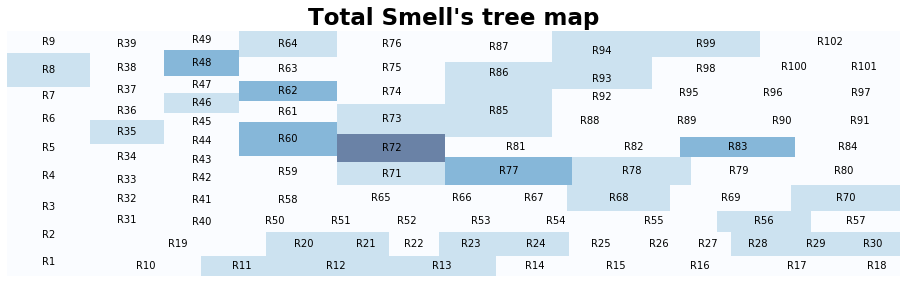

In [20]:
cmap = matplotlib.cm.Blues
mini=min(numberOfTotalSmells)
maxi=max(numberOfTotalSmells)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [matplotlib.cm.Blues(norm(value)) for value in numberOfTotalSmells]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 4.5)
squarify.plot(label=my_lables,sizes=my_values, color = colors, alpha=.6)
plt.title("Total Smell's tree map",fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()


{'whiskers': [<matplotlib.lines.Line2D at 0x1964270a1c8>,
 'caps': [<matplotlib.lines.Line2D at 0x19642717c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x19642717108>],
 'medians': [<matplotlib.lines.Line2D at 0x1964271cc08>],
 'fliers': [<matplotlib.lines.Line2D at 0x19642720b08>],
 'means': []}

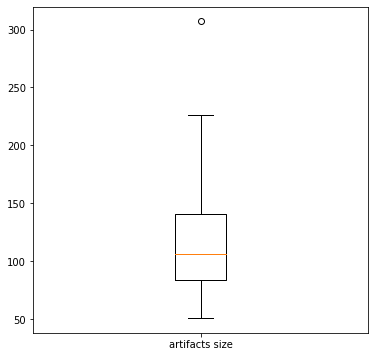

In [43]:
#artifact's total size 
fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xticklabels(['artifacts size'])
plt.boxplot(my_values)

{'whiskers': [<matplotlib.lines.Line2D at 0x196426a7508>,
 'caps': [<matplotlib.lines.Line2D at 0x1964291e188>,
 'boxes': [<matplotlib.lines.Line2D at 0x196426a3ac8>],
 'medians': [<matplotlib.lines.Line2D at 0x196426abc48>],
 'fliers': [<matplotlib.lines.Line2D at 0x196426abd48>],
 'means': []}

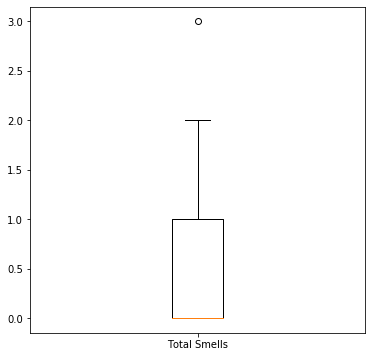

In [41]:
#smell's total size 
fig = plt.figure(1, figsize=(6, 6))
ax = fig.add_subplot(111)
ax.set_xticklabels(['Total Smells'])
plt.boxplot(numberOfTotalSmells)

[Text(1, 0, 'Total Smells'),
 Text(2, 0, 'Negative Smells'),
 Text(3, 0, 'Comparative Smells'),
 Text(4, 0, 'Superlative Smells'),
 Text(5, 0, 'WH_Pronouns Smell'),
 Text(6, 0, 'Pronouns Smells'),
 Text(7, 0, 'other Smells')]

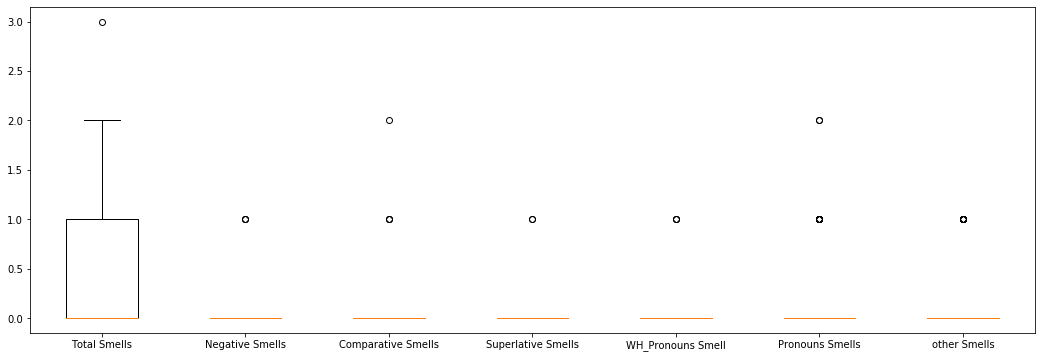

In [40]:
data = [numberOfTotalSmells,numberOfNegativeSmell,numberOfComparativeSmell,
       numberOfSuperlativeSmell,numberOfWH_PronounsSmell,numberOfPronounsSmell,numberOfotherSmell]
# Create a figure instance
fig = plt.figure(1, figsize=(18, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')






ax.set_xticklabels(['Total Smells', 'Negative Smells', 'Comparative Smells',
                    'Superlative Smells','WH_Pronouns Smell', 'Pronouns Smells', 'other Smells'])


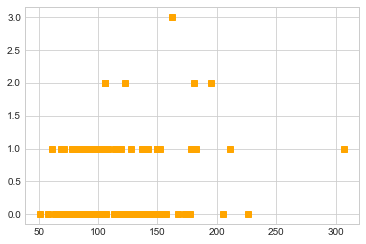

In [99]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.plot(my_values, numberOfTotalSmells, 's', color='orange')


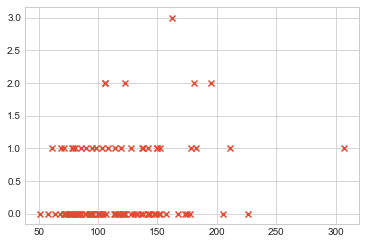

In [100]:
data = [my_values, numberOfTotalSmells]

#calculate 2d indicators
def indic(data):
    #alternatively you can calulate any other indicators
    max = np.max(data, axis=1)
    min = np.min(data, axis=1)
    return max, min

x,y = indic(data)
plt.scatter(my_values, numberOfTotalSmells, marker='x')
plt.show()


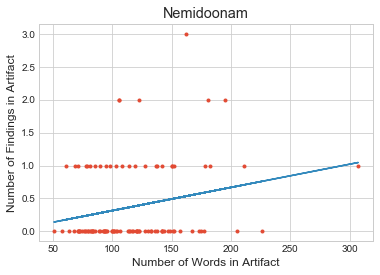

In [103]:
from numpy.polynomial.polynomial import polyfit
x = np.array(my_values)

y = np.array(numberOfTotalSmells)
b, m = polyfit(x, y, 1)

plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.title("Nemidoonam")
plt.xlabel("Number of Words in Artifact")
plt.ylabel("Number of Findings in Artifact")
plt.show()

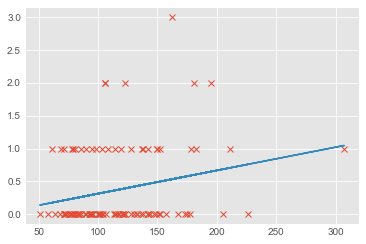

In [97]:
x = np.array(my_values)

y = np.array(numberOfTotalSmells)

plt.plot(x, y, 'x')



m, b = np.polyfit(x, y, 1)




plt.plot(x, m*x + b)
